### 160919 교수님이 요청하신 통계

#### 정리: 781번 매장(커스텀멜로우 홍대점)
1. 수집 기간:  2015-08-26 14:47:49  ~  2016-08-31 21:07:26
2. 총 Record 개수: 4,063,446개   
3. Valid한 방문 instance 개수 (같은 날의 record의 group 개수) - 16,319개
4. Unique한 직원 제외 고객 user 명수 -  15,464명(valid한 방문을 갖는 unique한 device_id 개수)



#### 786번 매장(코오롱스포츠 문정직영점)
1. 수집 기간:  2015-08-28 10:25:14 ~ 2016-08-31 20:24:54
2. 총 Record 개수: 4,126,399개 
3. Valid한 방문 instance 개수 (같은 날의 record의 group 개수): 23,576개
4. Unique한 직원 제외 고객 user 명수 - 18,856명





#### 781번 (커스텀멜로우 매장)

In [1]:
### import libraries
import pandas as pd
import datetime

In [53]:
df = pd.read_pickle("../data/781/781.p")

In [11]:
print(df.shape)
df.head(5)

(4063446, 8)


,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
0,1f-right-1,True,cae0f3cb170db4ae18897d6af8497c38,3330,781:7fea91f80d36bcc5:1f-right-1,NaN,NaN,1472645246100
1,right-test,True,cae0f3cb170db4ae18897d6af8497c38,3330,781:7fea91f80d36bcc5:right-test,NaN,NaN,1472645246100
2,out,NaN,c41e7932a5fedc55d61950559232c0bf,0,781:7fea91f80e6add4d:out,NaN,NaN,1472645241170
3,out,NaN,249e7ac1b1cd6ba9bee1cd81ef1e013f,85,781:7fea91f80ea49f2d:out,NaN,NaN,1472645240246
4,out,NaN,35e9e62a01594c31a9297c397cee0390,34,781:7fea91f80ee44f5d:out,NaN,NaN,1472645239227


In [12]:
df['ts'] = df['ts'].apply(lambda x: datetime.datetime.fromtimestamp(int(x/1000)).strftime('%Y-%m-%d %H:%M:%S'))

In [13]:
df.head(5)

,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
0,1f-right-1,True,cae0f3cb170db4ae18897d6af8497c38,3330,781:7fea91f80d36bcc5:1f-right-1,NaN,NaN,2016-08-31 21:07:26
1,right-test,True,cae0f3cb170db4ae18897d6af8497c38,3330,781:7fea91f80d36bcc5:right-test,NaN,NaN,2016-08-31 21:07:26
2,out,NaN,c41e7932a5fedc55d61950559232c0bf,0,781:7fea91f80e6add4d:out,NaN,NaN,2016-08-31 21:07:21
3,out,NaN,249e7ac1b1cd6ba9bee1cd81ef1e013f,85,781:7fea91f80ea49f2d:out,NaN,NaN,2016-08-31 21:07:20
4,out,NaN,35e9e62a01594c31a9297c397cee0390,34,781:7fea91f80ee44f5d:out,NaN,NaN,2016-08-31 21:07:19


In [14]:
df.tail(5)

,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
4063441,out,NaN,d0554ae8254cf22edae87bce9230b57e,25981,781:7feb09773aa56e59:out,NaN,NaN,2015-08-26 14:47:51
4063442,out,NaN,028a1f4dbca00ed06814fdda60f1b599,2673,781:7feb09773ac347cb:out,NaN,NaN,2015-08-26 14:47:51
4063443,out,NaN,373b818105152ed3ea1e503a2690ad8e,25971,781:7feb09773ae4ce78:out,NaN,NaN,2015-08-26 14:47:50
4063444,out,True,8b4357a377e3673d44489d67eee696ac,26023,781:7feb09773b1a576d:out,NaN,NaN,2015-08-26 14:47:49
4063445,out,NaN,c96d2af5dde757bf8caa8712818d984a,25906,781:7feb09773b1f2d03:out,NaN,NaN,2015-08-26 14:47:49


In [4]:
device_ids = df['device_id'].unique()
print (len(device_ids))
print (df.shape)

1562523
(4063446, 8)


In [24]:
df = pd.read_pickle("../data/781/781.p")

In [25]:
worker = set(df.loc[df['deny']==True]['device_id'].unique().tolist()) ### deny=True가 있는 user id의 set

df = df[-df.device_id.isin(worker)] ### worker가 아닌 customer들만 df에서 남김.

In [26]:
len(df['device_id'].unique().tolist())  ## unique한 직원 제외 device_id 개수

1561002

In [27]:
df = df.loc[(df['dwell_time'] > 0)]
len(df['device_id'].unique().tolist())  ## unique한 직원 제외 device_id 개수 (dwelltime >0인 로그들에 한해서)

1058842

In [28]:
df['date'] = df['ts'] // 86400000
df['date_device_id'] = df.date.map(str) + "_" + df.device_id

In [30]:
### traj1: Generate trajectories for each moving patterns
traj = df.groupby(['date', 'device_id'])['area']
trajformovings = traj.apply(lambda x: ','.join(x.sort_index(ascending=False))[::])
traj1 = trajformovings.to_frame(name='traj').reset_index()

In [31]:
outlogs = []
strr = 'out'
for i in range(30):
    outlogs.append(strr)
    strr = strr + ',out'

In [33]:
traj1 = traj1[-traj1.traj.isin(outlogs)]

In [34]:
traj1.head(5)

,date,device_id,traj
25,16673,028a1f4dbca00ed06814fdda60f1b599,"out,in,b1,1f,b1-left-3,b1-left-2,1f-right-1,1f..."
135,16673,0bc0852bb3b760c270585483cea24b4a,"out,in,b1,1f,b1-right"
275,16673,17490e4c91a3ad7d1bdef7e61ea469c3,"out,in,1f,1f-left-1"
352,16673,1de880af544e89c437bd624454615e36,"out,in,1f"
476,16673,29316db35d50dcbfaf79e2049e81dab5,"out,in,b1,1f"


In [36]:
### Count visit_counts for each user (history)

traj1.loc[:,'cnt'] = 1
traj1['new_visit_count'] = traj1[['device_id', 'cnt']].groupby('device_id').cumsum()
del traj1['cnt']
traj1.tail(5)

,date,device_id,traj,new_visit_count
1772687,17044,f8dee17c680b988e0c5033e4e7ec9d60,"out,in,1f",1
1772705,17044,fa3fbe6f45ca4a8d96f39a1645a06e92,"out,out,in,b1",1
1772752,17044,fe1e56e2f7ace78b48e858ba87a10280,"out,in,b1",1
1772762,17044,fe84da1b7b6ed761911f17ede4c05e45,"out,in,b1,b1-right,out",1
1772776,17044,ff73617d4b92a71182ca927f2576eab0,"out,in,b1-right,b1",1


In [37]:
traj1['date_device_id'] = traj1.date.map(str) + "_" + traj1.device_id

traj1 = traj1.set_index(['date_device_id'])

trajs_full = traj1
del traj1

### show some sample moving patterns having large historytrajs_full.loc[trajs_full['new_visit_count']>10].tail(5)

1     14788
2       578
3        63
4        18
5         9
6         2
7         1
8         1
9         2
12        2
Name: new_visit_count, dtype: int64


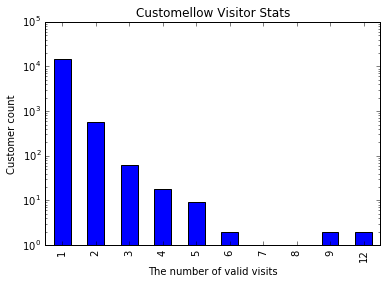

In [79]:
 # 재방문 횟수별 사람 수
customer_revisit_count = trajs_full.groupby(['device_id'])['new_visit_count'].max().value_counts().sort_index()
print (customer_revisit_count)

%matplotlib inline 
ax = customer_revisit_count.plot(kind='bar', logy=True, title='Customellow Visitor Stats')
ax.set_xlabel("The number of valid visits")
ax.set_ylabel("Customer count")



In [41]:
trajs_full.shape

(16319, 4)

In [50]:
len(trajs_full['device_id'].unique().tolist())

15464

코오롱 문정점

In [57]:
df = pd.read_pickle("../data/786/786.p")

In [59]:
print(df.shape)
df.head(5)

(4126399, 8)


,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
0,out,NaN,78183d8c22014c6b73c100412d43fab0,22,786:7fea91fa7c312d11:out,NaN,NaN,1472642694381
1,out,NaN,59410cf33f8b4f34e60a2dd3a7c96f3a,0,786:7fea91fa7d93fe35:out,1.0,5.0,1472642688704
2,out,NaN,c5ca41ed66022e1b187ac4f5d494bf3d,34,786:7fea91fa7f6f3f61:out,NaN,NaN,1472642681100
3,out,NaN,f4728c4273bcccb372e54973cdd64c3c,41,786:7fea91fa80170ffb:out,NaN,NaN,1472642678415
4,out,NaN,25e062883e35291b488ea1f49200e328,537,786:7fea91fa8168cc81:out,NaN,NaN,1472642673011


In [60]:
df['ts'] = df['ts'].apply(lambda x: datetime.datetime.fromtimestamp(int(x/1000)).strftime('%Y-%m-%d %H:%M:%S'))

In [61]:
df.head(5)

,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
0,out,NaN,78183d8c22014c6b73c100412d43fab0,22,786:7fea91fa7c312d11:out,NaN,NaN,2016-08-31 20:24:54
1,out,NaN,59410cf33f8b4f34e60a2dd3a7c96f3a,0,786:7fea91fa7d93fe35:out,1.0,5.0,2016-08-31 20:24:48
2,out,NaN,c5ca41ed66022e1b187ac4f5d494bf3d,34,786:7fea91fa7f6f3f61:out,NaN,NaN,2016-08-31 20:24:41
3,out,NaN,f4728c4273bcccb372e54973cdd64c3c,41,786:7fea91fa80170ffb:out,NaN,NaN,2016-08-31 20:24:38
4,out,NaN,25e062883e35291b488ea1f49200e328,537,786:7fea91fa8168cc81:out,NaN,NaN,2016-08-31 20:24:33


In [62]:
df.tail(5)

,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
4126394,in,True,3cb3c5d41981dcf7f75ffc1db3378c6e,37975,786:7feb08e1758f3ee2:in,NaN,NaN,2015-08-28 10:25:16
4126395,out,True,3cb3c5d41981dcf7f75ffc1db3378c6e,37975,786:7feb08e1758f3ee2:out,NaN,NaN,2015-08-28 10:25:16
4126396,1f,NaN,3a256162262ef2f26d547642036db82b,497,786:7feb08e1761b65c6:1f,NaN,NaN,2015-08-28 10:25:14
4126397,in,NaN,3a256162262ef2f26d547642036db82b,497,786:7feb08e1761b65c6:in,NaN,NaN,2015-08-28 10:25:14
4126398,out,NaN,3a256162262ef2f26d547642036db82b,3207,786:7feb08e1761b65c6:out,NaN,NaN,2015-08-28 10:25:14


In [63]:
device_ids = df['device_id'].unique()
print (len(device_ids))
print (df.shape)

627101
(4126399, 8)


In [81]:
df = pd.read_pickle("../data/786/786.p")

In [82]:
worker = set(df.loc[df['deny']==True]['device_id'].unique().tolist()) ### deny=True가 있는 user id의 set

df = df[-df.device_id.isin(worker)] ### worker가 아닌 customer들만 df에서 남김.

In [83]:
len(df['device_id'].unique().tolist())  ## unique한 직원 제외 device_id 개수

623251

In [84]:
df = df.loc[(df['dwell_time'] > 0)]
len(df['device_id'].unique().tolist())  ## unique한 직원 제외 device_id 개수 (dwelltime >0인 로그들에 한해서)

378931

In [68]:
df['date'] = df['ts'] // 86400000
df['date_device_id'] = df.date.map(str) + "_" + df.device_id

In [69]:
### traj1: Generate trajectories for each moving patterns
traj = df.groupby(['date', 'device_id'])['area']
trajformovings = traj.apply(lambda x: ','.join(x.sort_index(ascending=False))[::])
traj1 = trajformovings.to_frame(name='traj').reset_index()

In [70]:
outlogs = []
strr = 'out'
for i in range(30):
    outlogs.append(strr)
    strr = strr + ',out'

In [71]:
traj1 = traj1[-traj1.traj.isin(outlogs)]

In [72]:
traj1.head(5)

,date,device_id,traj
21,16675,02614c7588f7f8eaa0d3b9047ac08410,"out,in,1f,1f-right,2f-left,2f,2f-right"
23,16675,028a1f4dbca00ed06814fdda60f1b599,"out,in,3f,2f,2f-right,2f-inner,2f-left,1f,1f-r..."
61,16675,062c73a8b307fd05f6af2472a35671ef,"out,in,1f,1f-inner"
69,16675,06c041f68ec481883941d47d99d6903f,"out,in,3f,in,1f,out"
112,16675,0a47ed78e921824cf54dddcf49ae2911,"out,in"


In [73]:
### Count visit_counts for each user (history)

traj1.loc[:,'cnt'] = 1
traj1['new_visit_count'] = traj1[['device_id', 'cnt']].groupby('device_id').cumsum()
del traj1['cnt']
traj1.tail(5)

,date,device_id,traj,new_visit_count
1150219,17044,c9a3a8e86e4aba3ebb256dc5aaa5d407,"out,in,2f,1f,out,out",1
1150502,17044,ecde5f6bdf07b05696820bfbb6bc1576,"out,in",2
1150563,17044,f2dcc36d72b41bd74f70135a8ba16fc8,"out,in,2f,2f-inner,2f-left,1f,2f-right,1f-righ...",10
1150640,17044,fcb5f6456bf3cb590e46526b6527d2d1,"out,in,1f-right,1f,1f-left,1f-inner",1
1150645,17044,fd0f87ff650bc70919403a9c8eec8aea,"out,in,1f,2f,2f-inner,2f-left,1f,1f-right,out,...",4


In [74]:
traj1['date_device_id'] = traj1.date.map(str) + "_" + traj1.device_id

traj1 = traj1.set_index(['date_device_id'])

trajs_full2 = traj1
del traj1

1     16016
2      1928
3       507
4       204
5        85
6        43
7        25
8        15
9        14
10        6
11        4
12        2
13        1
14        1
15        1
20        1
23        2
27        1
Name: new_visit_count, dtype: int64


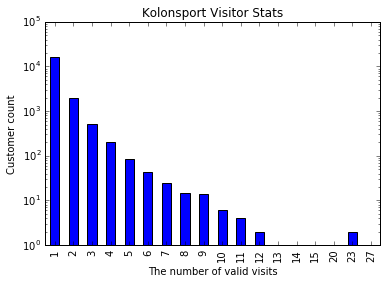

In [80]:
 # 재방문 횟수별 사람 수
customer_revisit_count = trajs_full2.groupby(['device_id'])['new_visit_count'].max().value_counts().sort_index()
print (customer_revisit_count)

%matplotlib inline 
ax = customer_revisit_count.plot(kind='bar', logy=True, title='Kolonsport Visitor Stats')
ax.set_xlabel("The number of valid visits")
ax.set_ylabel("Customer count")

In [76]:
trajs_full2.shape

(23576, 4)

In [77]:
len(trajs_full2['device_id'].unique().tolist())

18856

### Basic analysis of store 781(Customellow)

Date: 2016-08-24<br>
Writer: Sundong Kim<br>
1. Sequentially crawled(using since) from [here](http://walkinsights.com/api/v1/shops/781/sessions?&limit=10000&user_token=77eFJPB37UkgYyLjWZrx&user_email=jeeyeachung@kolon.com)<br>
2. 소진누나 디펜스 발표자료 및 워드 문서를 참고하니, 크롤링한 데이터는 커스텀멜로우 홍대점(shop code: 781)임<br>
3. 아래 유저의 위치 트래킹 데이터가 힌트 - 구역명이 커스텀멜로우 매장의 구역명과 일치<br>

```python
df.loc[:,"area"].value_counts(ascending=True)
```
> <pre>
b1-left-2          321
left-2            2375
b1-left-3         2424
b1-left-1         2529
1f-left-1         3431
b1-center-1       3487
b1-center-2       3558
b1-right          4061
left-test         4987
right-test        6329
1f-left-2         6956
1f-right-1       10006
1f-right-2       18871
b1               34315
1f               64512
in               82912
out            3711062
Name: area, dtype: int64
</pre>




In [10]:
df.loc[:,"revisit_count"].value_counts(ascending=True)

85.0        27
82.0        27
83.0        42
84.0        58
86.0        94
81.0       161
87.0       176
58.0       259
48.0       271
56.0       274
62.0       281
60.0       281
42.0       298
68.0       309
43.0       319
64.0       324
63.0       328
70.0       329
80.0       366
40.0       367
79.0       370
39.0       373
41.0       378
44.0       378
50.0       379
38.0       379
45.0       387
34.0       391
46.0       412
37.0       412
         ...  
27.0       613
22.0       619
16.0       671
20.0       671
19.0       687
77.0       747
76.0       748
57.0       824
18.0       854
15.0       859
78.0       991
90.0       993
13.0      1034
12.0      1130
14.0      1134
74.0      1428
75.0      1513
88.0      1619
10.0      1622
89.0      1654
11.0      1661
9.0       2330
8.0       2696
7.0       3670
6.0       3944
5.0       5158
4.0      10239
3.0      17591
2.0      35772
1.0     149888
Name: revisit_count, dtype: int64

In [11]:
df.loc[:,"device_id"].value_counts(ascending=True)

04234bfeb6036f5199bac2b583e307f9        1
6d5b183844adb44bfbd0519e1eb93b9a        1
bd58d6cd32851d53f45acc6a382bfe54        1
8ac98255df88f3f33ea1f7625df9be8a        1
cded69718e20356597ec31e5aa978cda        1
8dfaf6ae4b580dcc98f6f6b7c58135ee        1
4b465d14d9c599ea603b7b418cd17e72        1
a20d8267b52ac60c64700a372bdcbea0        1
ec268ca513e9c2e88a359f862c361f96        1
578a609476886aecaa89d2600b60945b        1
1e39fb91a85e2cfc22717212817a6abe        1
511701ec11cd3ab112b8eb86a84baf2a        1
c12f4e5a89578c782ed6c4209db7b4a3        1
af3520f84dbbc36700685a4f2488037d        1
cadd63f10f03f2ef5cbdfdeecb8244c3        1
1726b789e8f75f08901916abaf99b397        1
fd5563bc4d4014f690e08be2836d9f05        1
387774d214ce3a058f53e7cc48443d10        1
771816849a3e8f7ef8287c610785a1c9        1
4c18310654d6ef4b472beee0495f53c2        1
311841f9b6349bbe0a873f79f58b8eeb        1
6e5ec48996a05bb779253ae2805db8ac        1
e8045364664c6923b414c61fccf66519        1
3a85a56b34cc6734621fe6f6ed748b1d  

In [12]:
df.loc[:,"dwell_time"].value_counts(ascending=True)

33780          1
37798          1
15283          1
19389          1
21438          1
13235          1
10130          1
31674          1
29629          1
17341          1
9138           1
31673          1
25530          1
17342          1
35750          1
9139           1
44931          1
13232          1
19386          1
21433          1
23480          1
7085           1
32665          1
37820          1
25507          1
9131           1
30616          1
35774          1
41892          1
15287          1
          ...   
29         19215
27         19601
26         19919
25         20760
24         21552
23         21656
31         22161
18         22696
22         22894
17         23325
16         24343
30         24518
14         24580
19         24784
13         25120
15         25490
21         27350
12         28095
9          31467
11         32635
20         33168
10         33727
8          34037
7          39512
6          47461
5          61582
4          69062
2          728

In [13]:
df.loc[:,"area"].value_counts(ascending=True)

b1-left-2          321
left-2            2375
b1-left-3         2424
b1-left-1         2529
1f-left-1         3431
b1-center-1       3487
b1-center-2       3558
b1-right          4061
left-test         4987
right-test        6329
1f-left-2         6956
1f-right-1       10006
1f-right-2       18871
b1               34315
1f               64512
in               82912
out            3711062
Name: area, dtype: int64

In [24]:
criterion = df['device_id'].map(lambda x: x.startswith('f6258edf9145d1c0404e6f3d7a27a29d'))
df_f6258 = df[criterion]

In [25]:
df_f6258.loc[:,"area"].value_counts(ascending=True)

b1-left-2         8
b1-left-1        76
b1-left-3       102
b1-center-1     146
left-2          202
1f-left-1       214
b1-right        323
b1-center-2     581
left-test       708
out             927
1f             1248
1f-right-2     1284
1f-right-1     1337
1f-left-2      1399
right-test     1419
in             1445
b1             1777
Name: area, dtype: int64

In [26]:
df_f6258

,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
742,b1,True,f6258edf9145d1c0404e6f3d7a27a29d,2074,781:7fea94dd28f02d77:b1,NaN,NaN,1471868137725
778,1f-left-2,True,f6258edf9145d1c0404e6f3d7a27a29d,0,781:7fea94dd3bc7fc4d:1f-left-2,NaN,NaN,1471868060544
779,left-test,True,f6258edf9145d1c0404e6f3d7a27a29d,0,781:7fea94dd3bc7fc4d:left-test,NaN,NaN,1471868060544
1103,1f-left-2,True,f6258edf9145d1c0404e6f3d7a27a29d,0,781:7fea94de2b85ddf9:1f-left-2,NaN,NaN,1471867078562
1104,left-test,True,f6258edf9145d1c0404e6f3d7a27a29d,0,781:7fea94de2b85ddf9:left-test,NaN,NaN,1471867078562
1273,1f-right-1,True,f6258edf9145d1c0404e6f3d7a27a29d,1460,781:7fea94dea06cff37:1f-right-1,NaN,NaN,1471866599728
1274,right-test,True,f6258edf9145d1c0404e6f3d7a27a29d,1041,781:7fea94dea06cff37:right-test,NaN,NaN,1471866599728
1430,1f-right-2,True,f6258edf9145d1c0404e6f3d7a27a29d,1924,781:7fea94df11a06e9c:1f-right-2,NaN,NaN,1471866136057
1865,1f-right-1,True,f6258edf9145d1c0404e6f3d7a27a29d,0,781:7fea94e054803e19:1f-right-1,NaN,NaN,1471864813564
1866,right-test,True,f6258edf9145d1c0404e6f3d7a27a29d,0,781:7fea94e054803e19:right-test,NaN,NaN,1471864813564


In [37]:
df_f6258['ts'] = df_f6258['ts'].apply(lambda x: datetime.datetime.fromtimestamp(int(x/1000)).strftime('%Y-%m-%d %H:%M:%S'))

/Users/sundong/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
df_f6258

,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
742,b1,True,f6258edf9145d1c0404e6f3d7a27a29d,2074,781:7fea94dd28f02d77:b1,NaN,NaN,2016-08-22 21:15:37
778,1f-left-2,True,f6258edf9145d1c0404e6f3d7a27a29d,0,781:7fea94dd3bc7fc4d:1f-left-2,NaN,NaN,2016-08-22 21:14:20
779,left-test,True,f6258edf9145d1c0404e6f3d7a27a29d,0,781:7fea94dd3bc7fc4d:left-test,NaN,NaN,2016-08-22 21:14:20
1103,1f-left-2,True,f6258edf9145d1c0404e6f3d7a27a29d,0,781:7fea94de2b85ddf9:1f-left-2,NaN,NaN,2016-08-22 20:57:58
1104,left-test,True,f6258edf9145d1c0404e6f3d7a27a29d,0,781:7fea94de2b85ddf9:left-test,NaN,NaN,2016-08-22 20:57:58
1273,1f-right-1,True,f6258edf9145d1c0404e6f3d7a27a29d,1460,781:7fea94dea06cff37:1f-right-1,NaN,NaN,2016-08-22 20:49:59
1274,right-test,True,f6258edf9145d1c0404e6f3d7a27a29d,1041,781:7fea94dea06cff37:right-test,NaN,NaN,2016-08-22 20:49:59
1430,1f-right-2,True,f6258edf9145d1c0404e6f3d7a27a29d,1924,781:7fea94df11a06e9c:1f-right-2,NaN,NaN,2016-08-22 20:42:16
1865,1f-right-1,True,f6258edf9145d1c0404e6f3d7a27a29d,0,781:7fea94e054803e19:1f-right-1,NaN,NaN,2016-08-22 20:20:13
1866,right-test,True,f6258edf9145d1c0404e6f3d7a27a29d,0,781:7fea94e054803e19:right-test,NaN,NaN,2016-08-22 20:20:13


In [39]:
df_f6258.loc[:,"revisit_count"].value_counts(ascending=True)

65.0      13
45.0      16
60.0      17
47.0      21
48.0      22
43.0      25
31.0      27
56.0      28
3.0       29
37.0      29
67.0      30
16.0      30
26.0      31
12.0      31
50.0      32
17.0      32
52.0      33
55.0      33
41.0      34
6.0       37
53.0      39
38.0      39
34.0      39
42.0      40
23.0      40
35.0      41
36.0      42
49.0      43
62.0      43
24.0      43
        ... 
44.0      57
20.0      58
8.0       58
76.0      59
28.0      59
25.0      59
33.0      60
54.0      61
13.0      61
14.0      62
5.0       63
21.0      63
32.0      63
39.0      64
11.0      64
46.0      67
19.0      69
7.0       73
10.0      75
22.0      84
4.0       90
81.0     129
2.0      129
80.0     334
79.0     339
77.0     467
75.0     477
1.0      560
78.0     829
74.0    1009
Name: revisit_count, dtype: int64

In [40]:
df_f6258.loc[(df_f6258['dwell_time'] > 0)]
### 하지만 직원인 걸로 판명. (deny = True)

,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
742,b1,True,f6258edf9145d1c0404e6f3d7a27a29d,2074,781:7fea94dd28f02d77:b1,NaN,NaN,2016-08-22 21:15:37
1273,1f-right-1,True,f6258edf9145d1c0404e6f3d7a27a29d,1460,781:7fea94dea06cff37:1f-right-1,NaN,NaN,2016-08-22 20:49:59
1274,right-test,True,f6258edf9145d1c0404e6f3d7a27a29d,1041,781:7fea94dea06cff37:right-test,NaN,NaN,2016-08-22 20:49:59
1430,1f-right-2,True,f6258edf9145d1c0404e6f3d7a27a29d,1924,781:7fea94df11a06e9c:1f-right-2,NaN,NaN,2016-08-22 20:42:16
2302,1f,True,f6258edf9145d1c0404e6f3d7a27a29d,4587,781:7fea94e19912dead:1f,NaN,NaN,2016-08-22 19:58:04
2303,1f-right-2,True,f6258edf9145d1c0404e6f3d7a27a29d,1930,781:7fea94e19912dead:1f-right-2,NaN,NaN,2016-08-22 19:58:04
3070,1f-right-1,True,f6258edf9145d1c0404e6f3d7a27a29d,897,781:7fea94e3ac60ee4c:1f-right-1,NaN,NaN,2016-08-22 19:21:47
3071,right-test,True,f6258edf9145d1c0404e6f3d7a27a29d,897,781:7fea94e3ac60ee4c:right-test,NaN,NaN,2016-08-22 19:21:47
3905,1f-right-2,True,f6258edf9145d1c0404e6f3d7a27a29d,3242,781:7fea94e5ef860c1f:1f-right-2,NaN,NaN,2016-08-22 18:42:15
3906,1f,True,f6258edf9145d1c0404e6f3d7a27a29d,3583,781:7fea94e5ef936c38:1f,NaN,NaN,2016-08-22 18:42:15


In [43]:
df_f = df.loc[(df['deny'] != True)]

In [52]:
df_f.loc[:,"device_id"].value_counts(ascending=True)

04234bfeb6036f5199bac2b583e307f9       1
b86657a11349bb38b3a94f9c20ca96e4       1
46e1535d43b7a3004cf7aa98a3414279       1
771816849a3e8f7ef8287c610785a1c9       1
b327e55f391879de0dc9ebdc65a033aa       1
387774d214ce3a058f53e7cc48443d10       1
a20d8267b52ac60c64700a372bdcbea0       1
6b84fdffd8af9175a5538925586ec87b       1
6d5b183844adb44bfbd0519e1eb93b9a       1
8ac98255df88f3f33ea1f7625df9be8a       1
cded69718e20356597ec31e5aa978cda       1
8dfaf6ae4b580dcc98f6f6b7c58135ee       1
4b465d14d9c599ea603b7b418cd17e72       1
ec268ca513e9c2e88a359f862c361f96       1
1726b789e8f75f08901916abaf99b397       1
bd58d6cd32851d53f45acc6a382bfe54       1
578a609476886aecaa89d2600b60945b       1
507f47eda6b48c1dfb1142d497ee742e       1
30ae96283583b1f50fd50e4c3660a2be       1
005dd85cfcaf70aa50c727f75d48f6cc       1
92b4c8cb06144dcd8b2afb80b6d88cc3       1
e9a1c481f7c1e922b73fe53f282585f8       1
2b216ff4985a0a9a2b9795f140579608       1
fac02376c1e96fdc8a7d7afcb235375d       1
de026f1dc7696594

In [64]:
df_eacb = df_f.loc[(df_f['device_id'] == 'eacba9830a7b6267b3915eac4e7ae06c')]

In [65]:
df_eacb['ts'] = df_eacb['ts'].apply(lambda x: datetime.datetime.fromtimestamp(int(x/1000)).strftime('%Y-%m-%d %H:%M:%S'))
df_eacb

/Users/sundong/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
642315,out,NaN,eacba9830a7b6267b3915eac4e7ae06c,915,781:7feaa6fb60566c61:out,1.0,54.0,2016-06-27 14:16:55
642768,out,NaN,eacba9830a7b6267b3915eac4e7ae06c,884,781:7feaa6fd0e69ed41:out,1.0,54.0,2016-06-27 13:47:33
643414,out,NaN,eacba9830a7b6267b3915eac4e7ae06c,0,781:7feaa6ff847e3e56:out,1.0,54.0,2016-06-27 13:04:32
644266,out,NaN,eacba9830a7b6267b3915eac4e7ae06c,0,781:7feaa70317989daa:out,1.0,54.0,2016-06-27 12:02:04
790795,out,NaN,eacba9830a7b6267b3915eac4e7ae06c,939,781:7feaab342e583dc5:out,1.0,41.0,2016-06-14 11:28:29
857707,out,NaN,eacba9830a7b6267b3915eac4e7ae06c,0,781:7feaad1e70d27fda:out,1.0,35.0,2016-06-08 12:40:34
858514,out,NaN,eacba9830a7b6267b3915eac4e7ae06c,408,781:7feaad21a185acd8:out,1.0,35.0,2016-06-08 11:44:49
860063,out,NaN,eacba9830a7b6267b3915eac4e7ae06c,0,781:7feaad56b6963fea:out,1.0,34.0,2016-06-07 20:17:08
861124,out,NaN,eacba9830a7b6267b3915eac4e7ae06c,1365,781:7feaad5a2560df4b:out,1.0,34.0,2016-06-07 19:17:09
861912,out,NaN,eacba9830a7b6267b3915eac4e7ae06c,1735,781:7feaad5ce5a5afe7:out,1.0,34.0,2016-06-07 18:29:04


In [66]:
df_eacb = df_eacb.loc[(df_eacb['dwell_time'] > 0)]

In [71]:
df_eacb.loc[(df_eacb['area'] == 'in')]

,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
3181315,in,NaN,eacba9830a7b6267b3915eac4e7ae06c,4,781:7feaf2972f602b6c:in,4.0,23.0,2015-11-05 16:29:38
3428673,in,NaN,eacba9830a7b6267b3915eac4e7ae06c,119,781:7feafa006a965f64:in,3.0,13.0,2015-10-13 15:53:07
3942350,in,NaN,eacba9830a7b6267b3915eac4e7ae06c,60,781:7feb08cbca3b3a34:in,NaN,NaN,2015-08-28 16:43:58


In [106]:
df_in = df.loc[(df['area'] == 'in')]

In [107]:
df_in['ts'] = df_in['ts'].apply(lambda x: datetime.datetime.fromtimestamp(int(x/1000)).strftime('%Y-%m-%d %H:%M:%S'))
df_in

/Users/sundong/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
65,in,NaN,c1367d8e44228f2c361c9dc1242b2fb6,0,781:7fea94db0def6c2b:in,NaN,NaN,2016-08-22 21:52:25
105,in,NaN,ace0000fe51e650131ba827a838579ca,0,781:7fea94db2b561f69:in,NaN,NaN,2016-08-22 21:50:25
258,in,NaN,c7c6ed84e78dda2c2cdd93d6caae2471,0,781:7fea94dbb12efe52:in,NaN,NaN,2016-08-22 21:41:16
276,in,NaN,c7f9fa1e7c66c3885c6d0c3120022191,0,781:7fea94dbbdcd1c48:in,NaN,NaN,2016-08-22 21:40:25
291,in,True,7961e337158a5b699a0d6314a7c680b1,642,781:7fea94dbcc0e7c2c:in,NaN,NaN,2016-08-22 21:39:26
410,in,NaN,9ddc1934b6875e407c5672cd5712c867,0,781:7fea94dc24485cdf:in,NaN,NaN,2016-08-22 21:33:25
420,in,NaN,9924c32472a6c213f2dde1b51a8ed706,0,781:7fea94dc2b9aee52:in,NaN,NaN,2016-08-22 21:32:55
579,in,NaN,3c324a1f2d7212fe81478850da42e3ba,665,781:7fea94dcac839f12:in,16.0,8.0,2016-08-22 21:24:07
646,in,NaN,ee5aba4554f84a6f17c8bce560223a16,1519,781:7fea94dcdc178dbb:in,NaN,NaN,2016-08-22 21:20:52
652,in,NaN,1e826532c0a0081830dcbaf93ac00541,80,781:7fea94dce017ed46:in,NaN,NaN,2016-08-22 21:20:36


In [119]:
df_in = df_in.loc[(df_in['deny'] != True)]
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65865 entries, 65 to 3962129
Data columns (total 8 columns):
area              65865 non-null object
deny              0 non-null object
device_id         65865 non-null object
dwell_time        65865 non-null int64
key               65865 non-null object
revisit_count     6704 non-null float64
revisit_period    6704 non-null float64
ts                65865 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 4.5+ MB


In [120]:
df_in.sort(['revisit_count', 'device_id'], ascending=[0, 0])

/Users/sundong/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
1440254,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,1339,781:7feabe660b3b001b:in,60.0,2.0,2016-04-15 20:12:30
1442530,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,2084,781:7feabe6c07fc6f98:in,60.0,2.0,2016-04-15 18:27:52
1403518,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,764,781:7feabd28fd1b1224:in,59.0,1.0,2016-04-19 16:33:27
1408045,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,1060,781:7feabd6b4f80b408:in,59.0,3.0,2016-04-18 21:14:23
1476314,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,5,781:7feabf662822af10:in,59.0,1.0,2016-04-12 17:36:36
1478208,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,752,781:7feabf6d326e7afd:in,59.0,1.0,2016-04-12 15:33:34
1486107,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,1840,781:7feabfb8afef9f1f:in,59.0,3.0,2016-04-11 17:34:17
1486861,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,0,781:7feabfbb79f814fd:in,59.0,3.0,2016-04-11 16:45:32
1487360,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,511,781:7feabfbd88843685:in,59.0,3.0,2016-04-11 16:09:36
2843154,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,0,781:7feae7b399e6d469:in,54.0,1.0,2015-12-09 12:26:12


In [122]:
df_in_0d4d = df_in.loc[(df_in['device_id']=='0d4fd55bb363bf6f6f7f8b3342cd0467')]

In [125]:
df_in_0d4d.sort(['ts'], ascending=False)

/Users/sundong/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
1382352,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,1944,781:7feabc79f751680f:in,7.0,2.0,2016-04-21 19:32:11
1383070,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,812,781:7feabc7c501b776f:in,7.0,2.0,2016-04-21 18:51:10
1403518,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,764,781:7feabd28fd1b1224:in,59.0,1.0,2016-04-19 16:33:27
1408045,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,1060,781:7feabd6b4f80b408:in,59.0,3.0,2016-04-18 21:14:23
1440254,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,1339,781:7feabe660b3b001b:in,60.0,2.0,2016-04-15 20:12:30
1442530,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,2084,781:7feabe6c07fc6f98:in,60.0,2.0,2016-04-15 18:27:52
1476314,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,5,781:7feabf662822af10:in,59.0,1.0,2016-04-12 17:36:36
1478208,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,752,781:7feabf6d326e7afd:in,59.0,1.0,2016-04-12 15:33:34
1486107,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,1840,781:7feabfb8afef9f1f:in,59.0,3.0,2016-04-11 17:34:17
1486861,in,NaN,0d4fd55bb363bf6f6f7f8b3342cd0467,0,781:7feabfbb79f814fd:in,59.0,3.0,2016-04-11 16:45:32


부정확한 데이터 예시

In [126]:
df_0d4d = df.loc[(df['device_id']=='0d4fd55bb363bf6f6f7f8b3342cd0467')]

In [127]:
df_0d4d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489 entries, 1339847 to 3961086
Data columns (total 8 columns):
area              3489 non-null object
deny              3422 non-null object
device_id         3489 non-null object
dwell_time        3489 non-null int64
key               3489 non-null object
revisit_count     3440 non-null float64
revisit_period    3440 non-null float64
ts                3489 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 245.3+ KB


In [128]:
df_0d4d = df_0d4d.sort(['ts'], ascending=False)

/Users/sundong/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [130]:
df_0d4d['ts'] = df_0d4d['ts'].apply(lambda x: datetime.datetime.fromtimestamp(int(x/1000)).strftime('%Y-%m-%d %H:%M:%S'))

In [131]:
df_0d4d

,area,deny,device_id,dwell_time,key,revisit_count,revisit_period,ts
1339847,b1-center-2,True,0d4fd55bb363bf6f6f7f8b3342cd0467,0,781:7feabb36da314523:b1-center-2,57.0,1.0,2016-04-25 17:39:01
1342113,in,True,0d4fd55bb363bf6f6f7f8b3342cd0467,9987,781:7feabb3fd6743655:in,57.0,1.0,2016-04-25 15:01:59
1342112,b1,True,0d4fd55bb363bf6f6f7f8b3342cd0467,9987,781:7feabb3fd6743655:b1,57.0,1.0,2016-04-25 15:01:59
1342117,out,True,0d4fd55bb363bf6f6f7f8b3342cd0467,10170,781:7feabb3fdbd15c25:out,57.0,1.0,2016-04-25 15:01:37
1344835,left-2,True,0d4fd55bb363bf6f6f7f8b3342cd0467,0,781:7feabb4aeceeec08:left-2,57.0,1.0,2016-04-25 11:48:12
1344953,b1,True,0d4fd55bb363bf6f6f7f8b3342cd0467,1474,781:7feabb4b7985134f:b1,57.0,1.0,2016-04-25 11:38:36
1344954,in,True,0d4fd55bb363bf6f6f7f8b3342cd0467,1474,781:7feabb4b7985134f:in,57.0,1.0,2016-04-25 11:38:36
1344955,out,True,0d4fd55bb363bf6f6f7f8b3342cd0467,1541,781:7feabb4b7aff2707:out,57.0,1.0,2016-04-25 11:38:30
1345502,b1-right,True,0d4fd55bb363bf6f6f7f8b3342cd0467,0,781:7feabb7b83117b1e:b1-right,57.0,3.0,2016-04-24 21:39:06
1345882,b1,True,0d4fd55bb363bf6f6f7f8b3342cd0467,2846,781:7feabb7ce146e7a3:b1,57.0,3.0,2016-04-24 21:15:11
